## zmapio:  reading and writing ZMAP Plus Grid files 

### Basic usage of zmapio

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from zmapio import ZMAPGrid

In [2]:
%matplotlib inline

Reading a ZMAP file:

In [3]:
z_file = ZMAPGrid('./examples/NSLCU.dat')

Accessing the comments header:

In [4]:
for c in z_file.comments:
    print(c)

 Landmark Zmap grid file name:   .\DATA\NSLCU.dat
 Created/converted by Oasis Montaj, Geosoft Inc.


Plotting the grid data:

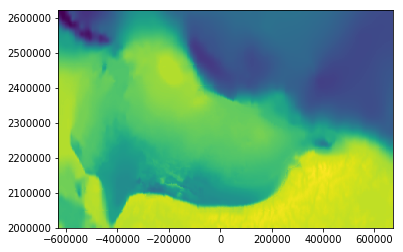

In [5]:
z_file.plot()

Counts for rows and columns:

In [6]:
z_file.no_cols, z_file.no_rows

(435, 208)

Shape for z-values:

In [7]:
z_file.z_values.shape

(208, 435)

Exporting to CSV file:

In [8]:
z_file.to_csv('./output/output.csv')

In [9]:
!head ./output/output.csv

-630000.0,2621000.0,-16481.9570313
-630000.0,2618000.0,-16283.9033203
-630000.0,2615000.0,-16081.5751953
-630000.0,2612000.0,-15856.7861328
-630000.0,2609000.0,-15583.7167969
-630000.0,2606000.0,-15255.734375
-630000.0,2603000.0,-14869.3769531
-630000.0,2600000.0,-14426.1513672
-630000.0,2597000.0,-13915.8769531
-630000.0,2594000.0,-13340.4677734


Exporting to WKT file:

In [10]:
z_file.to_wkt('./output/output.wkt')

Exporting to GeoJSON file:

In [11]:
z_file.to_geojson('./output/output.json')

Exporting to Pandas Dataframe:

In [12]:
df = z_file.to_dataframe()
df.head()

,X,Y,Z
0,-630000.0,2621000.0,-16481.957031
1,-630000.0,2618000.0,-16283.903320
2,-630000.0,2615000.0,-16081.575195
3,-630000.0,2612000.0,-15856.786133
4,-630000.0,2609000.0,-15583.716797


In [13]:
df.Z.describe()

count    90480.000000
mean     -5244.434235
std       4692.845490
min     -16691.371094
25%     -10250.590088
50%      -4003.433105
75%      -1320.896881
max       2084.417969
Name: Z, dtype: float64

Write a new ZMAP file as 3 nodes per line format:

In [14]:
z_file.write('./output/test.zmap', nodes_per_line=3)

In [15]:
!head ./output/test.zmap

! Landmark Zmap grid file name:   .\DATA\NSLCU.dat
! Created/converted by Oasis Montaj, Geosoft Inc.
@.\DATA\NSLCU.dat, GRID, 3
20, 1e+30, , 7, 1
208, 435, -630000.0, 672000.0, 2000000.0, 2621000.0
0.0, 0.0, 0.0
@
      -16481.9570313      -16283.9033203      -16081.5751953
      -15856.7861328      -15583.7167969      -15255.7343750
      -14869.3769531      -14426.1513672      -13915.8769531


Crearing a ZMAP object from string:

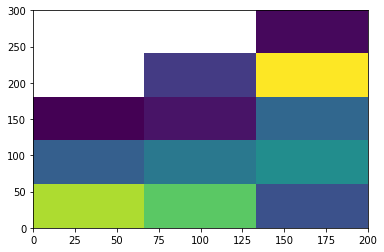

In [16]:
z_text = """
!
! File created by DMBTools2.GridFileFormats.ZmapPlusFile
!
@GRID FILE, GRID, 4
20, -9999.0000000, , 7, 1
6, 4, 0, 200, 0, 300
0.0, 0.0, 0.0
@
       -9999.0000000       -9999.0000000           3.0000000          32.0000000
          88.0000000          13.0000000
       -9999.0000000          20.0000000           8.0000000          42.0000000
          75.0000000           5.0000000
           5.0000000         100.0000000          35.0000000          50.0000000
          27.0000000           1.0000000
           2.0000000          36.0000000          10.0000000           6.0000000
           9.0000000       -9999.0000000
"""
z_t = ZMAPGrid(z_text)
z_t.plot()

Adding colorbar and colormap using matplotlib: 

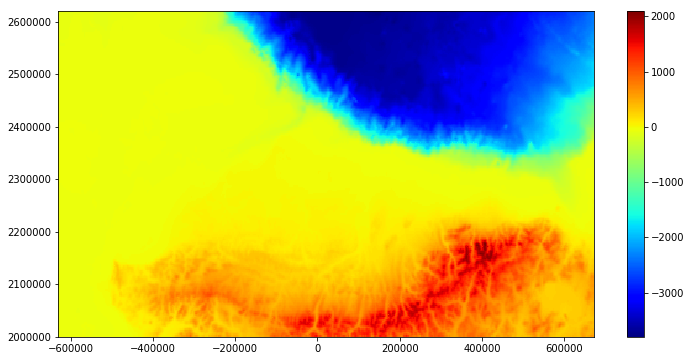

In [17]:
z_obj = ZMAPGrid('./examples/NStopo.dat')
fig=plt.figure(figsize=(12, 6))
z_obj.plot(cmap='jet')
plt.colorbar()

Creating a new ZMAP object from 2D-Numpy array with shape (no_cols, no_rows):

In [18]:
z_val = z_obj.z_values.swapaxes(0, 1)
print('Z-values shape: ', z_val.shape)
new_zgrid = ZMAPGrid(z_values=z_val, min_x=-630000.0000, max_x=672000.0000, 
                     min_y=2000000.0000,  max_y=2621000.0000)

Z-values shape:  (435, 208)


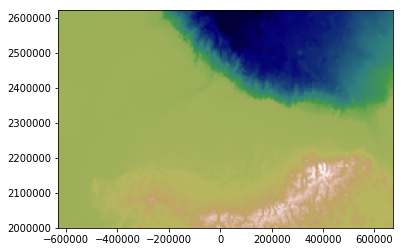

In [19]:
new_zgrid.plot(cmap='gist_earth')

Customize writing a ZMAP file:

In [20]:
new_zgrid.comments = ['this is', 'a test']
new_zgrid.nodes_per_line = 4
new_zgrid.field_width = 15
new_zgrid.decimal_places = 3
new_zgrid.name = 'test'
new_zgrid.write('./output/new_z.dat')

In [21]:
!head ./output/new_z.dat

!this is
!a test
@test, GRID, 4
15, 1e+30, , 3, 1
208, 435, -630000.0, 672000.0, 2000000.0, 2621000.0
0.0, 0.0, 0.0
@
        -67.214        -67.570        -67.147        -69.081
        -73.181        -74.308        -72.766        -72.034
        -70.514        -68.555        -66.195        -62.776


## References

* https://lists.osgeo.org/pipermail/gdal-dev/2011-June/029173.html
* https://gist.github.com/wassname/526d5fde3f3cbeb67da8
* https://pubs.usgs.gov/of/2003/ofr-03-230/DATA/